# Neural Network

We chose the neural network regression for the prediction of the demand of bikesharing rental hourly, because it is a flexible model that can capture complex relationships between the input and target variable. The drawbacks of the model are the high computational requirements and that it is like a black box, which means there is no insight to the relationships between predictors and outcome. 
In order to execute the Neural Network model Keras and Tensorflow should be installed. Here we use the same procedure as in the workshop 9 *neural networks for regression in keras*.

In [1]:
# import standard libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, ParameterGrid, GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, mean_absolute_percentage_error

# supress versioning warnings of keras
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

# import keras libraries

#from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.wrappers.scikit_learn import KerasRegressor
from keras.callbacks import EarlyStopping

### Data preparation

First, we quickly prepare the needed data and variables we want to work with.

In [2]:
# Load data
df_bike_trips = pd.read_parquet("../../data/bike_trips_hourly_FINAL.parquet")
df_bike_trips.head(2)

,starting_trips,Most_Occuring_Starting_Neighborhood,min_temp,precip,hour,month,is_weekday,season,is_holiday
index,,,,,,,,,
2016-01-01 00:00:00,26.0,109,6.7,0.0,0,1,1,4,1
2016-01-01 01:00:00,39.0,112,7.2,0.0,1,1,1,4,1


#### Define X and Y

In [3]:
# Defining inputs and output
y = df_bike_trips["starting_trips"]
X = df_bike_trips.drop("starting_trips", axis=1)

#### Train the model on the training set

Now we create our training and test split, which we will use to train the model and adjust the hyperparameters. We also normalize our data with StandardScaler().

In [4]:
# Adjusted test_size to 0.2
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [5]:
# Normalizing training data
st_scaler = StandardScaler()
st_scaler.fit(X_train)

X_train_scaled = st_scaler.transform(X_train)

## Hyperparameters

Since neural networks have a lot of hyperparameters that can be used to adjust the performance of the model, we will outline some of them in the following lines.

- Loss function
- Optimizer
- Epochs
- Batch size
- Activation function
- Number of hidden layers
- Number of nodes per hidden layer

We will be using `loss=MSE`, `optimizer=adam`, `epochs=100` (until we have adjusted all hyperparameters), `batch size=32 (default)`. 

Later we determine the best activation function, number of hidden layers and number of nodes per hidden layer through a grid search. Until then we try out both relu, tanh and sigmoid activation functions, a large amount of hidden layers and a larger amount of nodes in the hidden layer.

### Initializing the ANN

First, we create a baseline model so we can compare our performance of models with unadjusted vs. adjusted hyperparameters.

Our first model contains a `single hidden layer`, in which the `number of nodes is equal to the amount of features` we use. We also only use `one output node`, the `mean squared error loss function` and the `relu activation function`. 

In [6]:
# Defining Baseline Model
model = Sequential(
    [Dense(X_train.shape[1], activation="relu", input_shape=[X_train.shape[1]]),
     Dense(1)])

In [7]:
# Compiling the ANN
model.compile(loss='mse',
             optimizer="adam",
             metrics=["mae", "mse"])

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 8)                 72        
                                                                 
 dense_1 (Dense)             (None, 1)                 9         
                                                                 
Total params: 81
Trainable params: 81
Non-trainable params: 0
_________________________________________________________________


In [9]:
epochs = 100

history = model.fit(X_train_scaled, y_train.values,
                   epochs=epochs, validation_split=0.2)

Epoch 1/100
163/163 [==============================] - 1s 3ms/step - loss: 11015.4248 - mae: 74.1471 - mse: 11015.4248 - val_loss: 11226.7529 - val_mae: 76.3381 - val_mse: 11226.7529
Epoch 2/100
163/163 [==============================] - 0s 1ms/step - loss: 10704.3418 - mae: 72.5685 - mse: 10704.3418 - val_loss: 10810.8789 - val_mae: 74.3747 - val_mse: 10810.8789
Epoch 3/100
163/163 [==============================] - 0s 1ms/step - loss: 10208.2441 - mae: 70.1722 - mse: 10208.2441 - val_loss: 10186.0596 - val_mae: 71.4487 - val_mse: 10186.0596
Epoch 4/100
163/163 [==============================] - 0s 1ms/step - loss: 9494.9883 - mae: 66.7530 - mse: 9494.9883 - val_loss: 9325.1650 - val_mae: 67.3657 - val_mse: 9325.1650
Epoch 5/100
163/163 [==============================] - 0s 1ms/step - loss: 8602.6074 - mae: 62.4117 - mse: 8602.6074 - val_loss: 8345.2529 - val_mae: 62.7216 - val_mse: 8345.2529
Epoch 6/100
163/163 [==============================] - 0s 2ms/step - loss: 7656.0576 - mae: 5

163/163 [==============================] - 0s 1ms/step - loss: 3887.6042 - mae: 45.0046 - mse: 3887.6042 - val_loss: 3785.2993 - val_mae: 44.5537 - val_mse: 3785.2993
Epoch 47/100
163/163 [==============================] - 0s 1ms/step - loss: 3886.6296 - mae: 45.0175 - mse: 3886.6296 - val_loss: 3783.9272 - val_mae: 44.5533 - val_mse: 3783.9272
Epoch 48/100
163/163 [==============================] - 0s 1ms/step - loss: 3885.4382 - mae: 45.0028 - mse: 3885.4382 - val_loss: 3784.0647 - val_mae: 44.5361 - val_mse: 3784.0647
Epoch 49/100
163/163 [==============================] - 0s 1ms/step - loss: 3885.1841 - mae: 44.9521 - mse: 3885.1841 - val_loss: 3783.5747 - val_mae: 44.5185 - val_mse: 3783.5747
Epoch 50/100
163/163 [==============================] - 0s 1ms/step - loss: 3883.5330 - mae: 44.9858 - mse: 3883.5330 - val_loss: 3782.0022 - val_mae: 44.5281 - val_mse: 3782.0022
Epoch 51/100
163/163 [==============================] - 0s 1ms/step - loss: 3882.9597 - mae: 44.9940 - mse: 3882.

163/163 [==============================] - 0s 1ms/step - loss: 3860.9006 - mae: 44.7591 - mse: 3860.9006 - val_loss: 3763.9639 - val_mae: 44.3364 - val_mse: 3763.9639
Epoch 92/100
163/163 [==============================] - 0s 1ms/step - loss: 3860.2454 - mae: 44.7800 - mse: 3860.2454 - val_loss: 3764.1799 - val_mae: 44.3292 - val_mse: 3764.1799
Epoch 93/100
163/163 [==============================] - 0s 1ms/step - loss: 3860.0320 - mae: 44.7771 - mse: 3860.0320 - val_loss: 3763.5640 - val_mae: 44.3224 - val_mse: 3763.5640
Epoch 94/100
163/163 [==============================] - 0s 1ms/step - loss: 3860.1343 - mae: 44.7445 - mse: 3860.1343 - val_loss: 3764.2114 - val_mae: 44.3119 - val_mse: 3764.2114
Epoch 95/100
163/163 [==============================] - 0s 1ms/step - loss: 3859.9297 - mae: 44.7768 - mse: 3859.9297 - val_loss: 3763.4958 - val_mae: 44.3059 - val_mse: 3763.4958
Epoch 96/100
163/163 [==============================] - 0s 1ms/step - loss: 3859.1653 - mae: 44.7659 - mse: 3859.

In [10]:
model.predict(X_train_scaled[:10])

1/1 [==============================] - 0s 97ms/step


array([[ 28.133167],
       [ 30.99769 ],
       [153.99922 ],
       [ 73.16706 ],
       [ 43.74522 ],
       [139.43266 ],
       [ 10.21361 ],
       [ 71.18823 ],
       [ 86.2321  ],
       [133.77573 ]], dtype=float32)

In [11]:
df_history = pd.DataFrame(history.history)
df_history

,loss,mae,mse,val_loss,val_mae,val_mse
0,11015.424805,74.147095,11015.424805,11226.752930,76.338112,11226.752930
1,10704.341797,72.568520,10704.341797,10810.878906,74.374702,10810.878906
2,10208.244141,70.172218,10208.244141,10186.059570,71.448669,10186.059570
3,9494.988281,66.752983,9494.988281,9325.165039,67.365677,9325.165039
4,8602.607422,62.411713,8602.607422,8345.252930,62.721600,8345.252930
...,...,...,...,...,...,...
95,3859.165283,44.765884,3859.165283,3763.962646,44.299110,3763.962646
96,3858.611328,44.716660,3858.611328,3763.307617,44.304523,3763.307617
97,3858.455078,44.736523,3858.455078,3762.385498,44.307495,3762.385498
98,3857.811523,44.740135,3857.811523,3762.656250,44.303143,3762.656250


In [12]:
df_root_metrics = df_history[["mse", "val_mse"]].apply(np.sqrt)
df_root_metrics.rename({"mse":"rmse", "val_mse":"val_rmse"}, axis=1, inplace=True)
df_root_metrics

,rmse,val_rmse
0,104.954394,105.956373
1,103.461789,103.975376
2,101.035856,100.926010
3,97.442230,96.566894
4,92.750242,91.352356
...,...,...
95,62.122180,61.351142
96,62.117722,61.345804
97,62.116464,61.338287
98,62.111283,61.340494


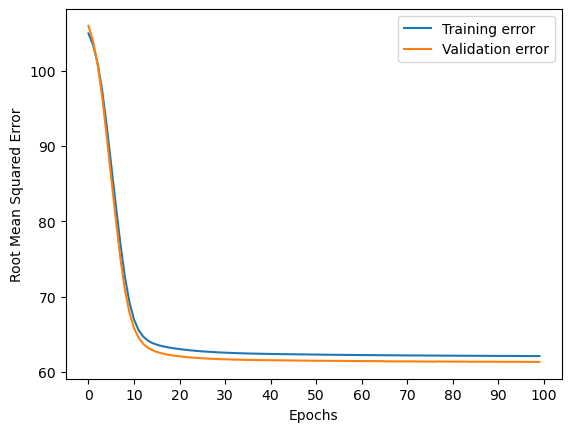

In [13]:
plt.Figure(figsize=(14,6), dpi=100)

plt.plot(df_root_metrics["rmse"], label = 'Training error')
plt.plot(df_root_metrics["val_rmse"], label = 'Validation error')

plt.xlabel("Epochs")
plt.ylabel("Root Mean Squared Error")

plt.xticks(np.arange(0, 100+1, 10.0))
plt.legend()

plt.show()

In [14]:
# Prediction on test set
X_test_scaled = st_scaler.transform(X_test)
y_pred = model.predict(X_test_scaled)

51/51 [==============================] - 0s 701us/step


In [15]:
# Performance
print(f"MAE: {mean_absolute_error(y_test, y_pred):.2f}")
print(f"MSE: {mean_squared_error(y_test, y_pred):.2f}")
print(f"MAPE: {(mean_absolute_error(y_test, y_pred) / y_test.mean()) * 100:.2f}%")
print(f"RMSE: {mean_squared_error(y_test, y_pred, squared=False):.2f}")

MAE: 43.36
MSE: 3606.16
MAPE: 56.99%
RMSE: 60.05


## Alternative activation functions

Here we will try out the impact of three different activation functions on our model performance.

Our second model contains a `single hidden layer`, in which the `number of nodes is equal to the amount of features` we use. We also only use `one output node`, the `mean squared error loss function` and the `sigmoid activation function`. 

In [16]:
# Define sigmoid model
model_sigmoid = Sequential(
    [Dense(X_train.shape[1], activation="sigmoid", input_shape=[X_train.shape[1]]),
     Dense(1)])

In [17]:
model_sigmoid.compile(loss='mse',
             optimizer="adam",
             metrics=["mae", "mse"])

In [18]:
model_sigmoid.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 8)                 72        
                                                                 
 dense_3 (Dense)             (None, 1)                 9         
                                                                 
Total params: 81
Trainable params: 81
Non-trainable params: 0
_________________________________________________________________


In [19]:
history_sigmoid = model_sigmoid.fit(X_train_scaled, y_train.values,
                   epochs=epochs, validation_split=0.2)

Epoch 1/100
163/163 [==============================] - 1s 3ms/step - loss: 11166.1641 - mae: 75.0314 - mse: 11166.1641 - val_loss: 11433.0264 - val_mae: 77.4477 - val_mse: 11433.0264
Epoch 2/100
163/163 [==============================] - 0s 1ms/step - loss: 10996.8945 - mae: 74.0836 - mse: 10996.8945 - val_loss: 11261.5977 - val_mae: 76.5212 - val_mse: 11261.5977
Epoch 3/100
163/163 [==============================] - 0s 2ms/step - loss: 10834.7158 - mae: 73.1652 - mse: 10834.7158 - val_loss: 11094.0664 - val_mae: 75.5984 - val_mse: 11094.0664
Epoch 4/100
163/163 [==============================] - 0s 1ms/step - loss: 10673.6768 - mae: 72.2530 - mse: 10673.6768 - val_loss: 10924.3096 - val_mae: 74.6572 - val_mse: 10924.3096
Epoch 5/100
163/163 [==============================] - 0s 1ms/step - loss: 10509.0107 - mae: 71.3254 - mse: 10509.0107 - val_loss: 10751.3535 - val_mae: 73.6985 - val_mse: 10751.3535
Epoch 6/100
163/163 [==============================] - 0s 2ms/step - loss: 10344.1143

163/163 [==============================] - 0s 1ms/step - loss: 5194.8921 - mae: 45.8420 - mse: 5194.8921 - val_loss: 5198.4126 - val_mae: 47.0558 - val_mse: 5198.4126
Epoch 47/100
163/163 [==============================] - 0s 1ms/step - loss: 5125.4575 - mae: 45.5563 - mse: 5125.4575 - val_loss: 5123.4961 - val_mae: 46.7191 - val_mse: 5123.4961
Epoch 48/100
163/163 [==============================] - 0s 1ms/step - loss: 5058.1201 - mae: 45.2453 - mse: 5058.1201 - val_loss: 5051.5137 - val_mae: 46.3896 - val_mse: 5051.5137
Epoch 49/100
163/163 [==============================] - 0s 1ms/step - loss: 4992.8784 - mae: 44.9821 - mse: 4992.8784 - val_loss: 4981.6807 - val_mae: 46.0615 - val_mse: 4981.6807
Epoch 50/100
163/163 [==============================] - 0s 1ms/step - loss: 4929.2886 - mae: 44.6816 - mse: 4929.2886 - val_loss: 4913.0029 - val_mae: 45.7511 - val_mse: 4913.0029
Epoch 51/100
163/163 [==============================] - 0s 1ms/step - loss: 4867.3428 - mae: 44.3949 - mse: 4867.

163/163 [==============================] - 0s 1ms/step - loss: 3589.5857 - mae: 40.3834 - mse: 3589.5857 - val_loss: 3421.3430 - val_mae: 40.0993 - val_mse: 3421.3430
Epoch 92/100
163/163 [==============================] - 0s 1ms/step - loss: 3578.0212 - mae: 40.3890 - mse: 3578.0212 - val_loss: 3407.7966 - val_mae: 40.0561 - val_mse: 3407.7966
Epoch 93/100
163/163 [==============================] - 0s 1ms/step - loss: 3567.2295 - mae: 40.3769 - mse: 3567.2295 - val_loss: 3395.1064 - val_mae: 40.0082 - val_mse: 3395.1064
Epoch 94/100
163/163 [==============================] - 0s 1ms/step - loss: 3556.8767 - mae: 40.3585 - mse: 3556.8767 - val_loss: 3382.6482 - val_mae: 39.9802 - val_mse: 3382.6482
Epoch 95/100
163/163 [==============================] - 0s 1ms/step - loss: 3546.8860 - mae: 40.3574 - mse: 3546.8860 - val_loss: 3371.4651 - val_mae: 39.9465 - val_mse: 3371.4651
Epoch 96/100
163/163 [==============================] - 0s 1ms/step - loss: 3537.3892 - mae: 40.3350 - mse: 3537.

In [20]:
model_sigmoid.predict(X_train_scaled[:10])

1/1 [==============================] - 0s 54ms/step


array([[ 11.165979],
       [ 18.43723 ],
       [109.06631 ],
       [ 79.93236 ],
       [ 76.67391 ],
       [109.07065 ],
       [ 17.692457],
       [104.07357 ],
       [ 97.8778  ],
       [109.061775]], dtype=float32)

In [21]:
sigmoid_df_history = pd.DataFrame(history_sigmoid.history)
sigmoid_df_history

,loss,mae,mse,val_loss,val_mae,val_mse
0,11166.164062,75.031380,11166.164062,11433.026367,77.447693,11433.026367
1,10996.894531,74.083557,10996.894531,11261.597656,76.521187,11261.597656
2,10834.715820,73.165176,10834.715820,11094.066406,75.598450,11094.066406
3,10673.676758,72.253014,10673.676758,10924.309570,74.657158,10924.309570
4,10509.010742,71.325432,10509.010742,10751.353516,73.698471,10751.353516
...,...,...,...,...,...,...
95,3537.389160,40.334991,3537.389160,3360.050781,39.911694,3360.050781
96,3528.182373,40.332649,3528.182373,3349.820312,39.896900,3349.820312
97,3519.292236,40.321247,3519.292236,3339.326904,39.861397,3339.326904
98,3510.791748,40.320610,3510.791748,3329.581543,39.855141,3329.581543


In [22]:
sigmoid_df_root_metrics = sigmoid_df_history[["mse", "val_mse"]].apply(np.sqrt)
sigmoid_df_root_metrics.rename({"mse":"rmse", "val_mse":"val_rmse"}, axis=1, inplace=True)
sigmoid_df_root_metrics

,rmse,val_rmse
0,105.670072,106.925331
1,104.866079,106.120675
2,104.089941,105.328374
3,103.313488,104.519422
4,102.513466,103.688734
...,...,...
95,59.475954,57.965945
96,59.398505,57.877632
97,59.323623,57.786909
98,59.251935,57.702526


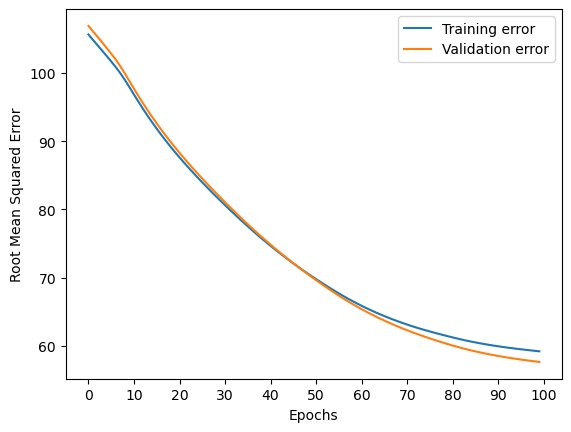

In [23]:
plt.Figure(figsize=(14,6), dpi=100)

plt.plot(sigmoid_df_root_metrics["rmse"], label = 'Training error')
plt.plot(sigmoid_df_root_metrics["val_rmse"], label = 'Validation error')

plt.xlabel("Epochs")
plt.ylabel("Root Mean Squared Error")

plt.xticks(np.arange(0, 100+1, 10.0))
plt.legend()

plt.show()

In [24]:
# Prediction on test set

X_test_scaled = st_scaler.transform(X_test)
y_pred = model_sigmoid.predict(X_test_scaled)

51/51 [==============================] - 0s 721us/step


In [25]:
# Report regression performance on test set
# To-Do: look at metrics again

print(f"MAE: {mean_absolute_error(y_test, y_pred):.2f}")
print(f"MSE: {mean_squared_error(y_test, y_pred):.2f}")
print(f"MAPE: {(mean_absolute_error(y_test, y_pred) / y_test.mean()) * 100:.2f}%")
print(f"RMSE: {mean_squared_error(y_test, y_pred, squared=False):.2f}")
# print(f"R^2: { r2_score(y_test, y_pred):.2f}")

MAE: 39.95
MSE: 3366.01
MAPE: 52.50%
RMSE: 58.02


### tanh

Our third model contains a `single hidden layer`, in which the `number of nodes is equal to the amount of features` we use. We also only use `one output node`, the `mean squared error loss function` and the `tanh activation function`. 

In [26]:
# Define hyperbolic tangent (tanh) model
model_tanh = Sequential(
    [Dense(X_train.shape[1], activation="tanh", input_shape=[X_train.shape[1]]),
     Dense(1)])

In [27]:
model_tanh.compile(loss='mse',
             optimizer="adam",
             metrics=["mae", "mse"])

In [28]:
model_tanh.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 8)                 72        
                                                                 
 dense_5 (Dense)             (None, 1)                 9         
                                                                 
Total params: 81
Trainable params: 81
Non-trainable params: 0
_________________________________________________________________


In [29]:
history_tanh = model_tanh.fit(X_train_scaled, y_train.values,
                   epochs=epochs, validation_split=0.2)

Epoch 1/100
163/163 [==============================] - 1s 2ms/step - loss: 11088.8682 - mae: 74.7764 - mse: 11088.8682 - val_loss: 11342.1289 - val_mae: 77.3159 - val_mse: 11342.1289
Epoch 2/100
163/163 [==============================] - 0s 1ms/step - loss: 10878.1211 - mae: 73.9449 - mse: 10878.1211 - val_loss: 11089.4580 - val_mae: 76.3052 - val_mse: 11089.4580
Epoch 3/100
163/163 [==============================] - 0s 1ms/step - loss: 10621.5566 - mae: 72.8128 - mse: 10621.5566 - val_loss: 10804.4053 - val_mae: 74.9973 - val_mse: 10804.4053
Epoch 4/100
163/163 [==============================] - 0s 1ms/step - loss: 10351.4102 - mae: 71.4511 - mse: 10351.4102 - val_loss: 10521.8906 - val_mae: 73.5460 - val_mse: 10521.8906
Epoch 5/100
163/163 [==============================] - 0s 1ms/step - loss: 10088.7129 - mae: 70.0236 - mse: 10088.7129 - val_loss: 10252.7383 - val_mae: 72.0461 - val_mse: 10252.7383
Epoch 6/100
163/163 [==============================] - 0s 1ms/step - loss: 9835.0869 

163/163 [==============================] - 0s 1ms/step - loss: 4993.8940 - mae: 44.3401 - mse: 4993.8940 - val_loss: 4980.6934 - val_mae: 45.3725 - val_mse: 4980.6934
Epoch 47/100
163/163 [==============================] - 0s 1ms/step - loss: 4925.9678 - mae: 44.0136 - mse: 4925.9678 - val_loss: 4901.7109 - val_mae: 44.9009 - val_mse: 4901.7109
Epoch 48/100
163/163 [==============================] - 0s 1ms/step - loss: 4851.9790 - mae: 43.5430 - mse: 4851.9790 - val_loss: 4816.2290 - val_mae: 44.3020 - val_mse: 4816.2290
Epoch 49/100
163/163 [==============================] - 0s 1ms/step - loss: 4777.0181 - mae: 43.0660 - mse: 4777.0181 - val_loss: 4739.7026 - val_mae: 43.8535 - val_mse: 4739.7026
Epoch 50/100
163/163 [==============================] - 0s 1ms/step - loss: 4709.4673 - mae: 42.7148 - mse: 4709.4673 - val_loss: 4669.3896 - val_mae: 43.4998 - val_mse: 4669.3896
Epoch 51/100
163/163 [==============================] - 0s 1ms/step - loss: 4646.2676 - mae: 42.4110 - mse: 4646.

163/163 [==============================] - 0s 1ms/step - loss: 2976.9766 - mae: 34.3555 - mse: 2976.9766 - val_loss: 2822.2898 - val_mae: 34.0252 - val_mse: 2822.2898
Epoch 92/100
163/163 [==============================] - 0s 1ms/step - loss: 2954.1172 - mae: 34.2855 - mse: 2954.1172 - val_loss: 2797.7083 - val_mae: 33.9081 - val_mse: 2797.7083
Epoch 93/100
163/163 [==============================] - 0s 1ms/step - loss: 2931.7175 - mae: 34.2199 - mse: 2931.7175 - val_loss: 2773.2957 - val_mae: 33.7763 - val_mse: 2773.2957
Epoch 94/100
163/163 [==============================] - 0s 1ms/step - loss: 2909.8484 - mae: 34.1180 - mse: 2909.8484 - val_loss: 2750.1541 - val_mae: 33.6513 - val_mse: 2750.1541
Epoch 95/100
163/163 [==============================] - 0s 1ms/step - loss: 2888.1619 - mae: 34.0382 - mse: 2888.1619 - val_loss: 2727.2537 - val_mae: 33.5362 - val_mse: 2727.2537
Epoch 96/100
163/163 [==============================] - 0s 1ms/step - loss: 2866.9182 - mae: 33.9808 - mse: 2866.

In [30]:
model_tanh.predict(X_train_scaled[:10])

1/1 [==============================] - 0s 52ms/step


array([[-15.183045],
       [ 14.101285],
       [120.643745],
       [ 66.61284 ],
       [ 30.898426],
       [119.21733 ],
       [ 12.099257],
       [120.088005],
       [107.654045],
       [113.73748 ]], dtype=float32)

In [31]:
tanh_df_history = pd.DataFrame(history_tanh.history)
tanh_df_history

,loss,mae,mse,val_loss,val_mae,val_mse
0,11088.868164,74.776390,11088.868164,11342.128906,77.315910,11342.128906
1,10878.121094,73.944862,10878.121094,11089.458008,76.305244,11089.458008
2,10621.556641,72.812759,10621.556641,10804.405273,74.997261,10804.405273
3,10351.410156,71.451141,10351.410156,10521.890625,73.545998,10521.890625
4,10088.712891,70.023560,10088.712891,10252.738281,72.046066,10252.738281
...,...,...,...,...,...,...
95,2866.918213,33.980812,2866.918213,2705.821045,33.439022,2705.821045
96,2846.120361,33.898113,2846.120361,2684.612061,33.321991,2684.612061
97,2825.461670,33.797768,2825.461670,2664.637939,33.212467,2664.637939
98,2805.269287,33.707916,2805.269287,2645.495605,33.127319,2645.495605


In [32]:
tanh_df_root_metrics = tanh_df_history[["mse", "val_mse"]].apply(np.sqrt)
tanh_df_root_metrics.rename({"mse":"rmse", "val_mse":"val_rmse"}, axis=1, inplace=True)
tanh_df_root_metrics

,rmse,val_rmse
0,105.303695,106.499431
1,104.298231,105.306496
2,103.060937,103.944241
3,101.741880,102.576267
4,100.442585,101.255806
...,...,...
95,53.543610,52.017507
96,53.349043,51.813242
97,53.155072,51.620131
98,52.964793,51.434382


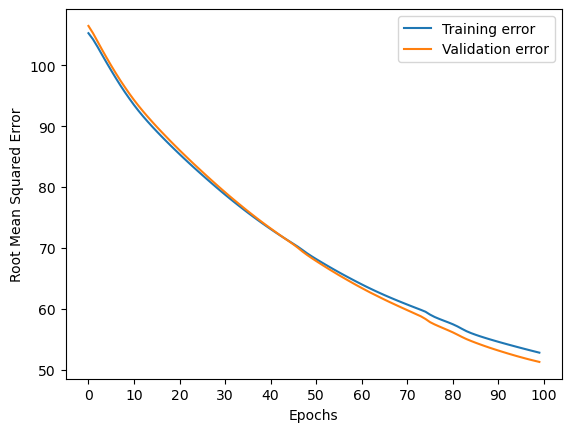

In [33]:
plt.Figure(figsize=(14,6), dpi=100)

plt.plot(tanh_df_root_metrics["rmse"], label = 'Training error')
plt.plot(tanh_df_root_metrics["val_rmse"], label = 'Validation error')

plt.xlabel("Epochs")
plt.ylabel("Root Mean Squared Error")

plt.xticks(np.arange(0, 100+1, 10.0))
plt.legend()

plt.show()

In [34]:
# Prediction on test set

X_test_scaled = st_scaler.transform(X_test)
y_pred = model_tanh.predict(X_test_scaled)

51/51 [==============================] - 0s 711us/step


In [35]:
# Report regression performance on test set

print(f"MAE: {mean_absolute_error(y_test, y_pred):.2f}")
print(f"MSE: {mean_squared_error(y_test, y_pred):.2f}")
print(f"MAPE: {(mean_absolute_error(y_test, y_pred) / y_test.mean()) * 100:.2f}%")
print(f"RMSE: {mean_squared_error(y_test, y_pred, squared=False):.2f}")

MAE: 33.49
MSE: 2660.69
MAPE: 44.02%
RMSE: 51.58


Seeing the performance of our baseline model with the relu activation function vs. sigmoid and hyperbolic tangent activation functions, we determined that the sigmoid activation function does not perform well enough for our purposes. 

While the hyperbolic tangent activation function performs slightly better against the relu activation function in this instance, we learnt about the vanishing gradient problem while working on the project. Therefore, we decided to keep considering both activation functions later on in our grid search.

## Number of hidden layers

Now we want to try and see the impact on performance when we change the number of hidden layers we use in our neural network. 

Our fourth model contains a `3 hidden layers`, in which the `number of nodes is equal to the amount of features` we use. We also only use `one output node`, the `mean squared error loss function` and the `relu activation function`. 

In [36]:
# Define model with more hidden layers
model_mlayers = Sequential(
    [Dense(X_train.shape[1], activation="relu", input_shape=[X_train.shape[1]]),
     Dense(X_train.shape[1], activation="relu"),
     Dense(X_train.shape[1], activation="relu"),
     Dense(1)])

In [37]:
model_mlayers.compile(loss='mse',
             optimizer="adam",
             metrics=["mae", "mse"])

In [38]:
model_mlayers.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 8)                 72        
                                                                 
 dense_7 (Dense)             (None, 8)                 72        
                                                                 
 dense_8 (Dense)             (None, 8)                 72        
                                                                 
 dense_9 (Dense)             (None, 1)                 9         
                                                                 
Total params: 225
Trainable params: 225
Non-trainable params: 0
_________________________________________________________________


In [39]:
history_mlayers = model_mlayers.fit(X_train_scaled, y_train.values,
                   epochs=epochs, validation_split=0.2)

Epoch 1/100
163/163 [==============================] - 1s 3ms/step - loss: 10880.5605 - mae: 72.9523 - mse: 10880.5605 - val_loss: 10413.3750 - val_mae: 71.4211 - val_mse: 10413.3750
Epoch 2/100
163/163 [==============================] - 0s 1ms/step - loss: 7660.6602 - mae: 60.1060 - mse: 7660.6602 - val_loss: 4880.9805 - val_mae: 51.3612 - val_mse: 4880.9805
Epoch 3/100
163/163 [==============================] - 0s 1ms/step - loss: 4369.6157 - mae: 49.2047 - mse: 4369.6157 - val_loss: 4034.6943 - val_mae: 47.1437 - val_mse: 4034.6943
Epoch 4/100
163/163 [==============================] - 0s 1ms/step - loss: 4076.6714 - mae: 47.0813 - mse: 4076.6714 - val_loss: 3933.4497 - val_mae: 46.1445 - val_mse: 3933.4497
Epoch 5/100
163/163 [==============================] - 0s 1ms/step - loss: 3994.0896 - mae: 46.2777 - mse: 3994.0896 - val_loss: 3878.2434 - val_mae: 45.8034 - val_mse: 3878.2434
Epoch 6/100
163/163 [==============================] - 0s 1ms/step - loss: 3950.5366 - mae: 46.0092 -

163/163 [==============================] - 0s 1ms/step - loss: 2324.0222 - mae: 31.9585 - mse: 2324.0222 - val_loss: 2253.5447 - val_mae: 31.1552 - val_mse: 2253.5447
Epoch 47/100
163/163 [==============================] - 0s 1ms/step - loss: 2309.3677 - mae: 31.7947 - mse: 2309.3677 - val_loss: 2245.8188 - val_mae: 30.9329 - val_mse: 2245.8188
Epoch 48/100
163/163 [==============================] - 0s 1ms/step - loss: 2305.3413 - mae: 31.7306 - mse: 2305.3413 - val_loss: 2228.1272 - val_mae: 31.2108 - val_mse: 2228.1272
Epoch 49/100
163/163 [==============================] - 0s 1ms/step - loss: 2293.3875 - mae: 31.5195 - mse: 2293.3875 - val_loss: 2223.3362 - val_mae: 31.3439 - val_mse: 2223.3362
Epoch 50/100
163/163 [==============================] - 0s 1ms/step - loss: 2287.5251 - mae: 31.6374 - mse: 2287.5251 - val_loss: 2207.1252 - val_mae: 30.9867 - val_mse: 2207.1252
Epoch 51/100
163/163 [==============================] - 0s 1ms/step - loss: 2275.8892 - mae: 31.4112 - mse: 2275.

163/163 [==============================] - 0s 1ms/step - loss: 2050.4541 - mae: 28.8393 - mse: 2050.4541 - val_loss: 1949.1388 - val_mae: 28.4590 - val_mse: 1949.1388
Epoch 92/100
163/163 [==============================] - 0s 1ms/step - loss: 2046.0347 - mae: 28.7092 - mse: 2046.0347 - val_loss: 1957.0046 - val_mae: 28.6716 - val_mse: 1957.0046
Epoch 93/100
163/163 [==============================] - 0s 1ms/step - loss: 2044.5048 - mae: 28.6396 - mse: 2044.5048 - val_loss: 1942.6423 - val_mae: 28.5616 - val_mse: 1942.6423
Epoch 94/100
163/163 [==============================] - 0s 1ms/step - loss: 2043.3489 - mae: 28.6324 - mse: 2043.3489 - val_loss: 1941.1023 - val_mae: 28.5821 - val_mse: 1941.1023
Epoch 95/100
163/163 [==============================] - 0s 1ms/step - loss: 2040.3669 - mae: 28.6496 - mse: 2040.3669 - val_loss: 1944.8870 - val_mae: 28.5624 - val_mse: 1944.8870
Epoch 96/100
163/163 [==============================] - 0s 1ms/step - loss: 2034.9565 - mae: 28.6160 - mse: 2034.

In [40]:
model_mlayers.predict(X_train_scaled[:10])

1/1 [==============================] - 0s 72ms/step


array([[ 10.267629],
       [ 19.78611 ],
       [203.03928 ],
       [ 98.71971 ],
       [ 56.168407],
       [194.99779 ],
       [ 10.217512],
       [132.31714 ],
       [110.40238 ],
       [141.21214 ]], dtype=float32)

In [41]:
mlayers_df_history = pd.DataFrame(history_mlayers.history)
mlayers_df_history

,loss,mae,mse,val_loss,val_mae,val_mse
0,10880.560547,72.952255,10880.560547,10413.375000,71.421143,10413.375000
1,7660.660156,60.105957,7660.660156,4880.980469,51.361221,4880.980469
2,4369.615723,49.204742,4369.615723,4034.694336,47.143684,4034.694336
3,4076.671387,47.081341,4076.671387,3933.449707,46.144485,3933.449707
4,3994.089600,46.277683,3994.089600,3878.243408,45.803375,3878.243408
...,...,...,...,...,...,...
95,2034.956543,28.615959,2034.956543,1950.640015,28.360430,1950.640015
96,2032.503540,28.418337,2032.503540,1932.316895,28.416145,1932.316895
97,2036.084229,28.492180,2036.084229,1939.180176,28.413792,1939.180176
98,2030.677979,28.496460,2030.677979,1935.743408,28.275904,1935.743408


In [42]:
mlayers_df_root_metrics = mlayers_df_history[["mse", "val_mse"]].apply(np.sqrt)
mlayers_df_root_metrics.rename({"mse":"rmse", "val_mse":"val_rmse"}, axis=1, inplace=True)
mlayers_df_root_metrics

,rmse,val_rmse
0,104.309925,102.045946
1,87.525197,69.864014
2,66.103069,63.519244
3,63.848817,62.717220
4,63.198810,62.275544
...,...,...
95,45.110493,44.166050
96,45.083296,43.958127
97,45.122990,44.036124
98,45.063044,43.997084


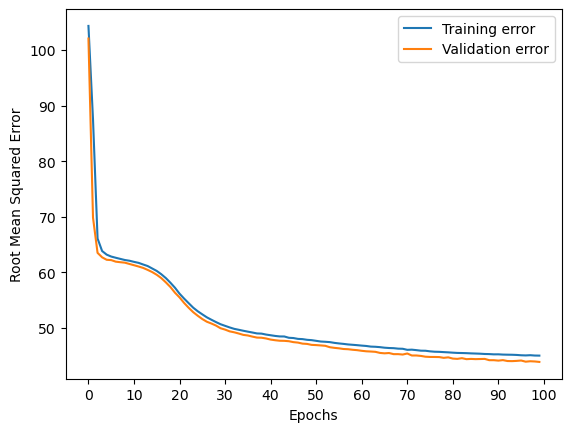

In [43]:
plt.Figure(figsize=(14,6), dpi=100)

plt.plot(mlayers_df_root_metrics["rmse"], label = 'Training error')
plt.plot(mlayers_df_root_metrics["val_rmse"], label = 'Validation error')

plt.xlabel("Epochs")
plt.ylabel("Root Mean Squared Error")

plt.xticks(np.arange(0, 100+1, 10.0))
plt.legend()

plt.show()

In [44]:
# Prediction on test set

X_test_scaled = st_scaler.transform(X_test)
y_pred = model_mlayers.predict(X_test_scaled)

51/51 [==============================] - 0s 801us/step


In [45]:
# Report regression performance on test set

print(f"MAE: {mean_absolute_error(y_test, y_pred):.2f}")
print(f"MSE: {mean_squared_error(y_test, y_pred):.2f}")
print(f"MAPE: {(mean_absolute_error(y_test, y_pred) / y_test.mean()) * 100:.2f}%")
print(f"RMSE: {mean_squared_error(y_test, y_pred, squared=False):.2f}")

MAE: 29.18
MSE: 1901.71
MAPE: 38.36%
RMSE: 43.61


## More nodes

Now we want to try and see the impact on performance when we change the number of nodes within the hidden layer.

Our fifth model contains a `single hidden layers`, in which the `number of nodes =(number of features)*2` we use. We also only use `one output node`, the `mean squared error loss function` and the `relu activation function`. 

In [46]:
# Define model with more nodes in hidden layer
model_mnodes = Sequential(
    [Dense(X_train.shape[1]*2, activation="relu", input_shape=[X_train.shape[1]]),
     Dense(1)])

In [47]:
model_mnodes.compile(loss='mse',
             optimizer="adam",
             metrics=["mae", "mse"])

In [48]:
model_mnodes.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 16)                144       
                                                                 
 dense_11 (Dense)            (None, 1)                 17        
                                                                 
Total params: 161
Trainable params: 161
Non-trainable params: 0
_________________________________________________________________


In [49]:
history_mnodes = model_mnodes.fit(X_train_scaled, y_train.values,
                   epochs=epochs, validation_split=0.2)

Epoch 1/100
163/163 [==============================] - 1s 2ms/step - loss: 11051.2246 - mae: 74.4016 - mse: 11051.2246 - val_loss: 11215.7705 - val_mae: 76.2344 - val_mse: 11215.7705
Epoch 2/100
163/163 [==============================] - 0s 1ms/step - loss: 10662.0068 - mae: 72.2011 - mse: 10662.0068 - val_loss: 10734.9004 - val_mae: 73.7046 - val_mse: 10734.9004
Epoch 3/100
163/163 [==============================] - 0s 1ms/step - loss: 10101.8311 - mae: 69.3048 - mse: 10101.8311 - val_loss: 10032.2090 - val_mae: 70.3076 - val_mse: 10032.2090
Epoch 4/100
163/163 [==============================] - 0s 1ms/step - loss: 9311.0391 - mae: 65.4578 - mse: 9311.0391 - val_loss: 9099.0459 - val_mae: 65.9125 - val_mse: 9099.0459
Epoch 5/100
163/163 [==============================] - 0s 1ms/step - loss: 8339.4873 - mae: 60.8584 - mse: 8339.4873 - val_loss: 8008.9746 - val_mae: 60.8877 - val_mse: 8008.9746
Epoch 6/100
163/163 [==============================] - 0s 1ms/step - loss: 7279.7769 - mae: 5

163/163 [==============================] - 0s 1ms/step - loss: 2844.6768 - mae: 37.1922 - mse: 2844.6768 - val_loss: 2737.2578 - val_mae: 36.4890 - val_mse: 2737.2578
Epoch 47/100
163/163 [==============================] - 0s 1ms/step - loss: 2829.6016 - mae: 37.0710 - mse: 2829.6016 - val_loss: 2723.6831 - val_mae: 36.3813 - val_mse: 2723.6831
Epoch 48/100
163/163 [==============================] - 0s 1ms/step - loss: 2815.1355 - mae: 37.0791 - mse: 2815.1355 - val_loss: 2709.7041 - val_mae: 36.2798 - val_mse: 2709.7041
Epoch 49/100
163/163 [==============================] - 0s 1ms/step - loss: 2800.9031 - mae: 36.8652 - mse: 2800.9031 - val_loss: 2696.9639 - val_mae: 36.1860 - val_mse: 2696.9639
Epoch 50/100
163/163 [==============================] - 0s 1ms/step - loss: 2788.3652 - mae: 36.8544 - mse: 2788.3652 - val_loss: 2685.1780 - val_mae: 36.1015 - val_mse: 2685.1780
Epoch 51/100
163/163 [==============================] - 0s 1ms/step - loss: 2775.3684 - mae: 36.7995 - mse: 2775.

163/163 [==============================] - 0s 1ms/step - loss: 2499.4021 - mae: 34.7793 - mse: 2499.4021 - val_loss: 2417.9407 - val_mae: 34.2121 - val_mse: 2417.9407
Epoch 92/100
163/163 [==============================] - 0s 1ms/step - loss: 2493.8328 - mae: 34.7760 - mse: 2493.8328 - val_loss: 2411.0164 - val_mae: 34.1300 - val_mse: 2411.0164
Epoch 93/100
163/163 [==============================] - 0s 1ms/step - loss: 2488.3613 - mae: 34.6520 - mse: 2488.3613 - val_loss: 2406.1736 - val_mae: 34.0634 - val_mse: 2406.1736
Epoch 94/100
163/163 [==============================] - 0s 1ms/step - loss: 2482.6597 - mae: 34.6973 - mse: 2482.6597 - val_loss: 2400.0229 - val_mae: 34.0149 - val_mse: 2400.0229
Epoch 95/100
163/163 [==============================] - 0s 1ms/step - loss: 2477.0559 - mae: 34.5732 - mse: 2477.0559 - val_loss: 2394.4751 - val_mae: 33.9311 - val_mse: 2394.4751
Epoch 96/100
163/163 [==============================] - 0s 1ms/step - loss: 2470.9070 - mae: 34.5077 - mse: 2470.

In [50]:
model_mnodes.predict(X_train_scaled[:10])

1/1 [==============================] - 0s 59ms/step


array([[-16.269472],
       [ -2.012303],
       [179.22441 ],
       [ 92.38196 ],
       [ 52.174072],
       [146.45602 ],
       [ 13.19936 ],
       [120.39035 ],
       [107.93149 ],
       [133.08537 ]], dtype=float32)

In [51]:
mnodes_df_history = pd.DataFrame(history_mnodes.history)
mnodes_df_history

,loss,mae,mse,val_loss,val_mae,val_mse
0,11051.224609,74.401634,11051.224609,11215.770508,76.234367,11215.770508
1,10662.006836,72.201111,10662.006836,10734.900391,73.704643,10734.900391
2,10101.831055,69.304817,10101.831055,10032.208984,70.307625,10032.208984
3,9311.039062,65.457771,9311.039062,9099.045898,65.912498,9099.045898
4,8339.487305,60.858448,8339.487305,8008.974609,60.887680,8008.974609
...,...,...,...,...,...,...
95,2470.906982,34.507710,2470.906982,2388.683350,33.893631,2388.683350
96,2466.222656,34.423595,2466.222656,2382.669922,33.876724,2382.669922
97,2460.102051,34.500839,2460.102051,2376.733154,33.796131,2376.733154
98,2454.725830,34.352398,2454.725830,2371.943604,33.848564,2371.943604


In [52]:
mnodes_df_root_metrics = mnodes_df_history[["mse", "val_mse"]].apply(np.sqrt)
mnodes_df_root_metrics.rename({"mse":"rmse", "val_mse":"val_rmse"}, axis=1, inplace=True)
mnodes_df_root_metrics

,rmse,val_rmse
0,105.124805,105.904535
1,103.256994,103.609364
2,100.507866,100.160915
3,96.493726,95.388919
4,91.320793,89.492875
...,...,...
95,49.708218,48.874158
96,49.661078,48.812600
97,49.599416,48.751750
98,49.545190,48.702604


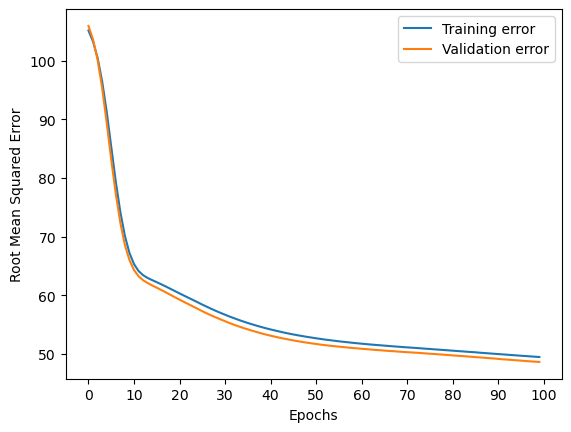

In [53]:
plt.Figure(figsize=(14,6), dpi=100)

plt.plot(mnodes_df_root_metrics["rmse"], label = 'Training error')
plt.plot(mnodes_df_root_metrics["val_rmse"], label = 'Validation error')

plt.xlabel("Epochs")
plt.ylabel("Root Mean Squared Error")

plt.xticks(np.arange(0, 100+1, 10.0))
plt.legend()

plt.show()

In [54]:
# Prediction on test set

X_test_scaled = st_scaler.transform(X_test)
y_pred = model_mnodes.predict(X_test_scaled)

51/51 [==============================] - 0s 801us/step


In [55]:
# Report regression performance on test set

print(f"MAE: {mean_absolute_error(y_test, y_pred):.2f}")
print(f"MSE: {mean_squared_error(y_test, y_pred):.2f}")
print(f"MAPE: {(mean_absolute_error(y_test, y_pred) / y_test.mean()) * 100:.2f}%")
print(f"RMSE: {mean_squared_error(y_test, y_pred, squared=False):.2f}")

MAE: 34.64
MSE: 2324.59
MAPE: 45.53%
RMSE: 48.21


In both instances that we looked at, the adjusting of the number of hidden layers and number of nodes within the hidden layers positively impacted the performance of the model. 

However, one should be aware that due to the stochastical nature of neural networks, the performance measures can be different each time the models are trained.

## Gridsearch for optimal hyperparameters

Now we want to perform a [grid search](https://machinelearningmastery.com/grid-search-hyperparameters-deep-learning-models-python-keras/) on our three chosen hyperparameters: `number of hidden layers`, `number of nodes in hidden layers`, and `activation functions`. We do this because we want to find the best combination of hyperparameters for our model performance.

In [56]:
# https://machinelearningmastery.com/grid-search-hyperparameters-deep-learning-models-python-keras/

# Create gridsearch model function because we had issues running the grid search when manually creating the model
def gs_model_create( n_nodes, n_hidden_layers, activation, loss='mse'):
    gs_model= Sequential()
    gs_model.add(Dense(n_nodes, activation=activation, input_shape=[X_train.shape[1]]))
    
    #add hidden layers if given parameter
    for _ in range(n_hidden_layers - 1):
        model.add(Dense(n_nodes, activation=activation))
    
    gs_model.add(Dense(1))
    gs_model.compile(loss=loss)
    return gs_model

In [57]:
#create parameter grid
parameters = { 
    'activation': ['relu', 'tanh'],
    'n_hidden_layers': [1, 2, 4, 8],
    'n_nodes': [1, X_train.shape[1], X_train.shape[1] * 2, X_train.shape[1] * 4]
    }

# grid search without taking average below (faster but best_parameter result changes often when running)
# grid_searchNEW = GridSearchCV(estimator = KerasRegressor(gs_model_create),
#                            param_grid = parameters,
#                            cv = 3)

We decided to take the average of the result of the gridsearch because the best parameters changed multiple times. 

In [58]:
# number of runs
n_runs = 5

# list to store the results of the runs
results = []

# run the grid search multiple times
for i in range(n_runs):
    grid_searchNEW = GridSearchCV(estimator = KerasRegressor(gs_model_create),
                           param_grid = parameters, return_train_score=True, 
                           cv = 3)
    grid_searchNEW.fit(X_train, y_train, verbose=1)
    results.append(grid_searchNEW.cv_results_)

136/136 [==============================] - 0s 871us/step - loss: 16184.0742


68/68 [==============================] - 0s 792us/step - loss: 11063.5283


68/68 [==============================] - 0s 770us/step - loss: 5374.5601


136/136 [==============================] - 0s 797us/step - loss: 11141.0459


136/136 [==============================] - 0s 779us/step - loss: 11270.4893


136/136 [==============================] - 0s 790us/step - loss: 11385.7764


136/136 [==============================] - 1s 857us/step - loss: 11200.7715


136/136 [==============================] - 0s 842us/step - loss: 11186.7832


68/68 [==============================] - 0s 717us/step - loss: 4977.8789


136/136 [==============================] - 0s 794us/step - loss: 11066.9375


136/136 [==============================] - 0s 805us/step - loss: 11197.0117


68/68 [==============================] - 0s 799us/step - loss: 11256.0742


68/68 [==============================] - 0s 807us/step - loss: 11151.0605


204/204 [==============================] - 1s 851us/step - loss: 5021.1475


In [59]:
# average the results
average_scores = {}
for score in ['mean_test_score', 'mean_train_score', 'std_test_score', 'std_train_score']:
    average_scores[score] = np.mean([result[score] for result in results], axis=0)

In [60]:
# best parameters and best score
best_params = results[0]['params'][np.argmax(average_scores['mean_test_score'])]
best_score = np.max(average_scores['mean_test_score'])
print("Best parameters: ", best_params)

Best parameters:  {'activation': 'relu', 'n_hidden_layers': 8, 'n_nodes': 32}


Through the grid-search we found that `relu, 4, 32` is the best combination of hyperparameters for performance. 

Again, be aware that the results of the gridsearch for neural networks is random because of gradient descent. The "best" combination of hyperparameters can change each run. We tried to stabilize the best parameter result by averaging it.

Now we will use the combination of hyperparameters above to retrain our NN with a larger number of epochs to see the impact on performance.

Our sixth model contains a `four hidden layers`, in which the `number of nodes =(number of features)*4` we use. We also only use `one output node`, the `mean squared error loss function` and the `relu activation function`. We use `epochs=500`.

In [61]:
large_epoch_model = Sequential(
    [Dense(X_train.shape[1]*4, activation="relu", input_shape=[X_train.shape[1]]),
     Dense(X_train.shape[1]*4, activation="relu"),
     Dense(X_train.shape[1]*4, activation="relu"),
     Dense(X_train.shape[1]*4, activation="relu"),
     Dense(1)])

In [62]:
large_epoch_model.compile(loss='mse',
             optimizer="adam",
             metrics=["mae", "mse"])

In [63]:
large_epoch_model.summary()

Model: "sequential_490"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2319 (Dense)          (None, 32)                288       
                                                                 
 dense_2320 (Dense)          (None, 32)                1056      
                                                                 
 dense_2321 (Dense)          (None, 32)                1056      
                                                                 
 dense_2322 (Dense)          (None, 32)                1056      
                                                                 
 dense_2323 (Dense)          (None, 1)                 33        
                                                                 
Total params: 3,489
Trainable params: 3,489
Non-trainable params: 0
_________________________________________________________________


In [64]:
#we use epochs=500
history_large_epoch_model = large_epoch_model.fit(X_train_scaled, y_train.values,
                   epochs=500, validation_split=0.2)

Epoch 1/500
163/163 [==============================] - 1s 3ms/step - loss: 7235.8013 - mae: 59.6017 - mse: 7235.8013 - val_loss: 4041.2981 - val_mae: 47.2248 - val_mse: 4041.2981
Epoch 2/500
163/163 [==============================] - 0s 2ms/step - loss: 3822.7913 - mae: 44.2118 - mse: 3822.7913 - val_loss: 3490.6965 - val_mae: 42.0010 - val_mse: 3490.6965
Epoch 3/500
163/163 [==============================] - 0s 2ms/step - loss: 3169.5044 - mae: 38.7747 - mse: 3169.5044 - val_loss: 2701.6272 - val_mae: 36.2343 - val_mse: 2701.6272
Epoch 4/500
163/163 [==============================] - 0s 2ms/step - loss: 2527.0410 - mae: 33.3825 - mse: 2527.0410 - val_loss: 2311.1152 - val_mae: 32.5155 - val_mse: 2311.1152
Epoch 5/500
163/163 [==============================] - 0s 2ms/step - loss: 2216.3142 - mae: 30.4961 - mse: 2216.3142 - val_loss: 2039.8933 - val_mae: 29.1108 - val_mse: 2039.8933
Epoch 6/500
163/163 [==============================] - 0s 2ms/step - loss: 2039.0608 - mae: 28.7242 - mse

163/163 [==============================] - 0s 2ms/step - loss: 723.8698 - mae: 16.4859 - mse: 723.8698 - val_loss: 761.1774 - val_mae: 17.4477 - val_mse: 761.1774
Epoch 48/500
163/163 [==============================] - 0s 2ms/step - loss: 723.2653 - mae: 16.5622 - mse: 723.2653 - val_loss: 780.9290 - val_mae: 17.3725 - val_mse: 780.9290
Epoch 49/500
163/163 [==============================] - 0s 2ms/step - loss: 694.2822 - mae: 16.3634 - mse: 694.2822 - val_loss: 751.6201 - val_mae: 17.2034 - val_mse: 751.6201
Epoch 50/500
163/163 [==============================] - 0s 2ms/step - loss: 718.7736 - mae: 16.5882 - mse: 718.7736 - val_loss: 729.9247 - val_mae: 16.7165 - val_mse: 729.9247
Epoch 51/500
163/163 [==============================] - 0s 2ms/step - loss: 685.2262 - mae: 15.9721 - mse: 685.2262 - val_loss: 745.0977 - val_mae: 16.6883 - val_mse: 745.0977
Epoch 52/500
163/163 [==============================] - 0s 2ms/step - loss: 676.6205 - mae: 15.8464 - mse: 676.6205 - val_loss: 746.2

163/163 [==============================] - 0s 2ms/step - loss: 614.8955 - mae: 14.9798 - mse: 614.8955 - val_loss: 811.6711 - val_mae: 17.1651 - val_mse: 811.6711
Epoch 94/500
163/163 [==============================] - 0s 2ms/step - loss: 605.6821 - mae: 15.0597 - mse: 605.6821 - val_loss: 709.9410 - val_mae: 16.0593 - val_mse: 709.9410
Epoch 95/500
163/163 [==============================] - 0s 2ms/step - loss: 601.0547 - mae: 14.9849 - mse: 601.0547 - val_loss: 864.6725 - val_mae: 17.8684 - val_mse: 864.6725
Epoch 96/500
163/163 [==============================] - 0s 2ms/step - loss: 604.4695 - mae: 14.9455 - mse: 604.4695 - val_loss: 714.0186 - val_mae: 16.2681 - val_mse: 714.0186
Epoch 97/500
163/163 [==============================] - 0s 2ms/step - loss: 609.6315 - mae: 15.1039 - mse: 609.6315 - val_loss: 715.8379 - val_mae: 16.0654 - val_mse: 715.8379
Epoch 98/500
163/163 [==============================] - 0s 2ms/step - loss: 613.2841 - mae: 14.9687 - mse: 613.2841 - val_loss: 768.9

163/163 [==============================] - 0s 2ms/step - loss: 576.1354 - mae: 14.5296 - mse: 576.1354 - val_loss: 795.6902 - val_mae: 16.8499 - val_mse: 795.6902
Epoch 140/500
163/163 [==============================] - 0s 2ms/step - loss: 591.5516 - mae: 14.8974 - mse: 591.5516 - val_loss: 734.2645 - val_mae: 16.1944 - val_mse: 734.2645
Epoch 141/500
163/163 [==============================] - 0s 2ms/step - loss: 590.5540 - mae: 14.6879 - mse: 590.5540 - val_loss: 761.9969 - val_mae: 16.4729 - val_mse: 761.9969
Epoch 142/500
163/163 [==============================] - 0s 2ms/step - loss: 583.3524 - mae: 14.7598 - mse: 583.3524 - val_loss: 771.1443 - val_mae: 16.5487 - val_mse: 771.1443
Epoch 143/500
163/163 [==============================] - 0s 2ms/step - loss: 574.2540 - mae: 14.4521 - mse: 574.2540 - val_loss: 699.7851 - val_mae: 15.7849 - val_mse: 699.7851
Epoch 144/500
163/163 [==============================] - 0s 2ms/step - loss: 595.5868 - mae: 14.9408 - mse: 595.5868 - val_loss: 

163/163 [==============================] - 0s 2ms/step - loss: 557.9340 - mae: 14.4413 - mse: 557.9340 - val_loss: 734.3751 - val_mae: 16.1469 - val_mse: 734.3751
Epoch 186/500
163/163 [==============================] - 0s 2ms/step - loss: 555.4217 - mae: 14.2910 - mse: 555.4217 - val_loss: 710.7729 - val_mae: 16.1521 - val_mse: 710.7729
Epoch 187/500
163/163 [==============================] - 0s 2ms/step - loss: 542.3777 - mae: 14.1303 - mse: 542.3777 - val_loss: 738.8290 - val_mae: 16.9456 - val_mse: 738.8290
Epoch 188/500
163/163 [==============================] - 0s 2ms/step - loss: 543.8305 - mae: 14.1538 - mse: 543.8305 - val_loss: 724.7521 - val_mae: 15.9981 - val_mse: 724.7521
Epoch 189/500
163/163 [==============================] - 0s 2ms/step - loss: 543.0444 - mae: 14.1097 - mse: 543.0444 - val_loss: 706.2929 - val_mae: 15.8120 - val_mse: 706.2929
Epoch 190/500
163/163 [==============================] - 0s 2ms/step - loss: 547.4135 - mae: 14.2307 - mse: 547.4135 - val_loss: 

163/163 [==============================] - 0s 2ms/step - loss: 538.5121 - mae: 14.1288 - mse: 538.5121 - val_loss: 730.8799 - val_mae: 16.1411 - val_mse: 730.8799
Epoch 232/500
163/163 [==============================] - 0s 2ms/step - loss: 530.6884 - mae: 14.1230 - mse: 530.6884 - val_loss: 751.0386 - val_mae: 16.0965 - val_mse: 751.0386
Epoch 233/500
163/163 [==============================] - 0s 2ms/step - loss: 531.0107 - mae: 14.0071 - mse: 531.0107 - val_loss: 815.5578 - val_mae: 17.1226 - val_mse: 815.5578
Epoch 234/500
163/163 [==============================] - 0s 2ms/step - loss: 540.5001 - mae: 14.0726 - mse: 540.5001 - val_loss: 727.7153 - val_mae: 16.0160 - val_mse: 727.7153
Epoch 235/500
163/163 [==============================] - 0s 2ms/step - loss: 522.3484 - mae: 13.9734 - mse: 522.3484 - val_loss: 731.6164 - val_mae: 16.1326 - val_mse: 731.6164
Epoch 236/500
163/163 [==============================] - 0s 2ms/step - loss: 541.8652 - mae: 14.0708 - mse: 541.8652 - val_loss: 

163/163 [==============================] - 0s 2ms/step - loss: 511.7227 - mae: 13.7618 - mse: 511.7227 - val_loss: 791.8622 - val_mae: 16.7314 - val_mse: 791.8622
Epoch 278/500
163/163 [==============================] - 0s 2ms/step - loss: 522.3081 - mae: 14.0862 - mse: 522.3081 - val_loss: 748.2571 - val_mae: 16.2783 - val_mse: 748.2571
Epoch 279/500
163/163 [==============================] - 0s 2ms/step - loss: 515.1721 - mae: 13.8435 - mse: 515.1721 - val_loss: 757.4939 - val_mae: 16.5503 - val_mse: 757.4939
Epoch 280/500
163/163 [==============================] - 0s 2ms/step - loss: 512.2800 - mae: 13.8864 - mse: 512.2800 - val_loss: 853.1781 - val_mae: 17.4259 - val_mse: 853.1781
Epoch 281/500
163/163 [==============================] - 0s 2ms/step - loss: 530.2430 - mae: 14.1056 - mse: 530.2430 - val_loss: 706.9314 - val_mae: 15.9471 - val_mse: 706.9314
Epoch 282/500
163/163 [==============================] - 0s 2ms/step - loss: 514.4888 - mae: 13.8418 - mse: 514.4888 - val_loss: 

163/163 [==============================] - 0s 2ms/step - loss: 508.9987 - mae: 13.7552 - mse: 508.9987 - val_loss: 732.2958 - val_mae: 16.2620 - val_mse: 732.2958
Epoch 324/500
163/163 [==============================] - 0s 2ms/step - loss: 497.6983 - mae: 13.6486 - mse: 497.6983 - val_loss: 746.8558 - val_mae: 16.6163 - val_mse: 746.8558
Epoch 325/500
163/163 [==============================] - 0s 2ms/step - loss: 492.6698 - mae: 13.4744 - mse: 492.6698 - val_loss: 793.7962 - val_mae: 16.7718 - val_mse: 793.7962
Epoch 326/500
163/163 [==============================] - 0s 2ms/step - loss: 500.6389 - mae: 13.7512 - mse: 500.6389 - val_loss: 772.4434 - val_mae: 16.4491 - val_mse: 772.4434
Epoch 327/500
163/163 [==============================] - 0s 2ms/step - loss: 502.2572 - mae: 13.6175 - mse: 502.2572 - val_loss: 763.6414 - val_mae: 16.6113 - val_mse: 763.6414
Epoch 328/500
163/163 [==============================] - 0s 2ms/step - loss: 508.0657 - mae: 13.8774 - mse: 508.0657 - val_loss: 

163/163 [==============================] - 0s 2ms/step - loss: 492.0183 - mae: 13.3309 - mse: 492.0183 - val_loss: 749.3584 - val_mae: 16.4860 - val_mse: 749.3584
Epoch 370/500
163/163 [==============================] - 0s 2ms/step - loss: 490.1204 - mae: 13.4615 - mse: 490.1204 - val_loss: 727.6710 - val_mae: 16.2004 - val_mse: 727.6710
Epoch 371/500
163/163 [==============================] - 0s 2ms/step - loss: 487.4605 - mae: 13.3905 - mse: 487.4605 - val_loss: 767.0601 - val_mae: 16.5095 - val_mse: 767.0601
Epoch 372/500
163/163 [==============================] - 0s 2ms/step - loss: 481.3486 - mae: 13.3699 - mse: 481.3486 - val_loss: 818.5087 - val_mae: 17.1699 - val_mse: 818.5087
Epoch 373/500
163/163 [==============================] - 0s 2ms/step - loss: 490.9567 - mae: 13.4930 - mse: 490.9567 - val_loss: 740.6613 - val_mae: 16.4286 - val_mse: 740.6613
Epoch 374/500
163/163 [==============================] - 0s 2ms/step - loss: 497.0885 - mae: 13.5545 - mse: 497.0885 - val_loss: 

163/163 [==============================] - 0s 2ms/step - loss: 487.8999 - mae: 13.5646 - mse: 487.8999 - val_loss: 738.8787 - val_mae: 16.2867 - val_mse: 738.8787
Epoch 416/500
163/163 [==============================] - 1s 3ms/step - loss: 482.3884 - mae: 13.3721 - mse: 482.3884 - val_loss: 820.9609 - val_mae: 17.1566 - val_mse: 820.9609
Epoch 417/500
163/163 [==============================] - 0s 3ms/step - loss: 492.1364 - mae: 13.4807 - mse: 492.1364 - val_loss: 761.7850 - val_mae: 16.4313 - val_mse: 761.7850
Epoch 418/500
163/163 [==============================] - 0s 2ms/step - loss: 471.0432 - mae: 13.2066 - mse: 471.0432 - val_loss: 779.9115 - val_mae: 17.0946 - val_mse: 779.9115
Epoch 419/500
163/163 [==============================] - 0s 2ms/step - loss: 501.9675 - mae: 13.7642 - mse: 501.9675 - val_loss: 745.7308 - val_mae: 16.4374 - val_mse: 745.7308
Epoch 420/500
163/163 [==============================] - 0s 2ms/step - loss: 484.6096 - mae: 13.4309 - mse: 484.6096 - val_loss: 

163/163 [==============================] - 0s 2ms/step - loss: 472.0661 - mae: 13.1849 - mse: 472.0661 - val_loss: 774.9963 - val_mae: 16.5075 - val_mse: 774.9963
Epoch 462/500
163/163 [==============================] - 0s 2ms/step - loss: 470.7472 - mae: 13.2843 - mse: 470.7472 - val_loss: 753.2689 - val_mae: 16.3771 - val_mse: 753.2689
Epoch 463/500
163/163 [==============================] - 0s 2ms/step - loss: 469.8661 - mae: 13.0986 - mse: 469.8661 - val_loss: 774.2986 - val_mae: 16.7674 - val_mse: 774.2986
Epoch 464/500
163/163 [==============================] - 0s 2ms/step - loss: 471.1021 - mae: 13.2032 - mse: 471.1021 - val_loss: 819.8409 - val_mae: 17.2819 - val_mse: 819.8409
Epoch 465/500
163/163 [==============================] - 0s 2ms/step - loss: 459.4405 - mae: 12.9982 - mse: 459.4405 - val_loss: 784.5617 - val_mae: 16.9727 - val_mse: 784.5617
Epoch 466/500
163/163 [==============================] - 0s 2ms/step - loss: 469.2701 - mae: 13.2258 - mse: 469.2701 - val_loss: 

In [65]:
large_epoch_model.predict(X_train_scaled[:10])

1/1 [==============================] - 0s 85ms/step


array([[  8.20732 ],
       [ 19.029694],
       [265.15176 ],
       [ 90.9815  ],
       [ 81.063705],
       [210.91734 ],
       [  3.057849],
       [141.25368 ],
       [150.4789  ],
       [119.52456 ]], dtype=float32)

In [66]:
large_epoch_model_df_history = pd.DataFrame(history_large_epoch_model.history)
large_epoch_model_df_history

,loss,mae,mse,val_loss,val_mae,val_mse
0,7235.801270,59.601673,7235.801270,4041.298096,47.224838,4041.298096
1,3822.791260,44.211800,3822.791260,3490.696533,42.000984,3490.696533
2,3169.504395,38.774662,3169.504395,2701.627197,36.234329,2701.627197
3,2527.041016,33.382473,2527.041016,2311.115234,32.515522,2311.115234
4,2216.314209,30.496143,2216.314209,2039.893311,29.110815,2039.893311
...,...,...,...,...,...,...
495,463.584839,13.117723,463.584839,806.502380,16.833069,806.502380
496,451.451324,13.019347,451.451324,724.823242,16.110111,724.823242
497,470.204163,13.197186,470.204163,747.524353,16.437801,747.524353
498,468.095245,13.129860,468.095245,818.452759,17.237368,818.452759


In [67]:
large_epoch_model_df_root_metrics = large_epoch_model_df_history[["mse", "val_mse"]].apply(np.sqrt)
large_epoch_model_df_root_metrics.rename({"mse":"rmse", "val_mse":"val_rmse"}, axis=1, inplace=True)
large_epoch_model_df_root_metrics

,rmse,val_rmse
0,85.063513,63.571205
1,61.828725,59.082117
2,56.298352,51.977180
3,50.269683,48.074060
4,47.077746,45.165178
...,...,...
495,21.531020,28.398986
496,21.247384,26.922542
497,21.684192,27.340892
498,21.635509,28.608613


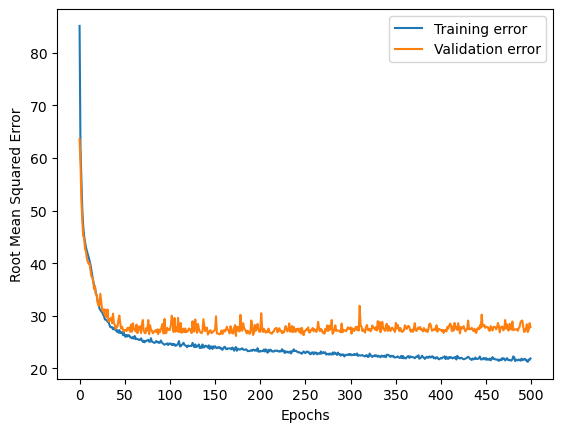

In [68]:
plt.Figure(figsize=(14,6), dpi=100)

plt.plot(large_epoch_model_df_root_metrics["rmse"], label = 'Training error')
plt.plot(large_epoch_model_df_root_metrics["val_rmse"], label = 'Validation error')

plt.xlabel("Epochs")
plt.ylabel("Root Mean Squared Error")

plt.xticks(np.arange(0, 500+1, 50.0))
plt.legend()

plt.show()

In [69]:
# Prediction on test set
X_test_scaled = st_scaler.transform(X_test)
y_pred = large_epoch_model.predict(X_test_scaled)

51/51 [==============================] - 0s 841us/step


In [70]:
#Performance
print(f"MAE: {mean_absolute_error(y_test, y_pred):.2f}")
print(f"MSE: {mean_squared_error(y_test, y_pred):.2f}")
print(f"MAPE: {(mean_absolute_error(y_test, y_pred) / y_test.mean()) * 100:.2f}%")
print(f"RMSE: {mean_squared_error(y_test, y_pred, squared=False):.2f}")

MAE: 16.73
MSE: 756.99
MAPE: 21.99%
RMSE: 27.51


We can see that the model is already performing much better compared to our previous models.

## Dropout layers
However, we believe that the model is overfitting a bit, despite our efforts. Therefore we will add dropout layers to the same neural network in the next step.

In [71]:
large_drop_model = Sequential(
    [Dense(X_train.shape[1]*4, activation="relu", input_shape=[X_train.shape[1]]),
     Dense(X_train.shape[1]*4, activation="relu"),
     Dropout(0.2),
     Dense(X_train.shape[1]*4, activation="relu"),
     Dropout(0.2),
     Dense(X_train.shape[1]*4, activation="relu"),
     Dropout(0.2),
     Dense(1)])

In [72]:
large_drop_model.compile(loss='mse',
             optimizer="adam",
             metrics=["mae", "mse"])

In [73]:
large_drop_model.summary()

Model: "sequential_491"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2324 (Dense)          (None, 32)                288       
                                                                 
 dense_2325 (Dense)          (None, 32)                1056      
                                                                 
 dropout (Dropout)           (None, 32)                0         
                                                                 
 dense_2326 (Dense)          (None, 32)                1056      
                                                                 
 dropout_1 (Dropout)         (None, 32)                0         
                                                                 
 dense_2327 (Dense)          (None, 32)                1056      
                                                                 
 dropout_2 (Dropout)         (None, 32)             

In [74]:
history_large_drop_model = large_drop_model.fit(X_train_scaled, y_train.values,
                   epochs=500, validation_split=0.2)

Epoch 1/500
163/163 [==============================] - 1s 3ms/step - loss: 7558.9907 - mae: 60.5643 - mse: 7558.9907 - val_loss: 4184.1577 - val_mae: 46.7551 - val_mse: 4184.1577
Epoch 2/500
163/163 [==============================] - 0s 2ms/step - loss: 4264.7993 - mae: 46.9448 - mse: 4264.7993 - val_loss: 3804.0981 - val_mae: 44.0411 - val_mse: 3804.0981
Epoch 3/500
163/163 [==============================] - 0s 2ms/step - loss: 3888.2227 - mae: 44.0767 - mse: 3888.2227 - val_loss: 3294.3577 - val_mae: 40.2169 - val_mse: 3294.3577
Epoch 4/500
163/163 [==============================] - 0s 2ms/step - loss: 3386.5374 - mae: 39.4443 - mse: 3386.5374 - val_loss: 2647.7830 - val_mae: 35.2436 - val_mse: 2647.7830
Epoch 5/500
163/163 [==============================] - 0s 2ms/step - loss: 2925.5315 - mae: 35.8875 - mse: 2925.5315 - val_loss: 2326.6504 - val_mae: 32.6583 - val_mse: 2326.6504
Epoch 6/500
163/163 [==============================] - 1s 4ms/step - loss: 2676.1628 - mae: 33.5973 - mse

Epoch 47/500
163/163 [==============================] - 0s 2ms/step - loss: 1151.1926 - mae: 21.5151 - mse: 1151.1926 - val_loss: 838.4727 - val_mae: 18.0860 - val_mse: 838.4727
Epoch 48/500
163/163 [==============================] - 0s 2ms/step - loss: 1173.0278 - mae: 21.7220 - mse: 1173.0278 - val_loss: 935.6932 - val_mae: 18.9041 - val_mse: 935.6932
Epoch 49/500
163/163 [==============================] - 0s 2ms/step - loss: 1168.7126 - mae: 21.7975 - mse: 1168.7126 - val_loss: 893.0035 - val_mae: 18.6285 - val_mse: 893.0035
Epoch 50/500
163/163 [==============================] - 0s 2ms/step - loss: 1090.5560 - mae: 21.2055 - mse: 1090.5560 - val_loss: 825.8159 - val_mae: 18.3209 - val_mse: 825.8159
Epoch 51/500
163/163 [==============================] - 0s 2ms/step - loss: 1108.2526 - mae: 21.2056 - mse: 1108.2526 - val_loss: 826.4428 - val_mae: 17.6263 - val_mse: 826.4428
Epoch 52/500
163/163 [==============================] - 0s 2ms/step - loss: 1080.0984 - mae: 21.1147 - mse: 10

163/163 [==============================] - 0s 2ms/step - loss: 1034.4957 - mae: 20.5275 - mse: 1034.4957 - val_loss: 831.1844 - val_mae: 17.6093 - val_mse: 831.1844
Epoch 94/500
163/163 [==============================] - 0s 2ms/step - loss: 997.3605 - mae: 20.0184 - mse: 997.3605 - val_loss: 847.1896 - val_mae: 18.1359 - val_mse: 847.1896
Epoch 95/500
163/163 [==============================] - 0s 2ms/step - loss: 1022.2849 - mae: 20.3824 - mse: 1022.2849 - val_loss: 791.6476 - val_mae: 17.2551 - val_mse: 791.6476
Epoch 96/500
163/163 [==============================] - 0s 2ms/step - loss: 1050.2489 - mae: 20.4987 - mse: 1050.2489 - val_loss: 841.4198 - val_mae: 17.8269 - val_mse: 841.4198
Epoch 97/500
163/163 [==============================] - 0s 2ms/step - loss: 1043.7513 - mae: 20.5121 - mse: 1043.7513 - val_loss: 819.2343 - val_mae: 17.4168 - val_mse: 819.2343
Epoch 98/500
163/163 [==============================] - 0s 2ms/step - loss: 1034.7124 - mae: 20.3286 - mse: 1034.7124 - val_l

163/163 [==============================] - 0s 2ms/step - loss: 997.8912 - mae: 19.8420 - mse: 997.8912 - val_loss: 772.6025 - val_mae: 16.7585 - val_mse: 772.6025
Epoch 140/500
163/163 [==============================] - 0s 2ms/step - loss: 953.1005 - mae: 19.6346 - mse: 953.1005 - val_loss: 737.5764 - val_mae: 16.5699 - val_mse: 737.5764
Epoch 141/500
163/163 [==============================] - 0s 2ms/step - loss: 1014.0970 - mae: 19.9169 - mse: 1014.0970 - val_loss: 763.4436 - val_mae: 17.2172 - val_mse: 763.4436
Epoch 142/500
163/163 [==============================] - 0s 2ms/step - loss: 936.2756 - mae: 19.6065 - mse: 936.2756 - val_loss: 749.9820 - val_mae: 16.9925 - val_mse: 749.9820
Epoch 143/500
163/163 [==============================] - 0s 2ms/step - loss: 931.5603 - mae: 19.6615 - mse: 931.5603 - val_loss: 762.8450 - val_mae: 16.6805 - val_mse: 762.8450
Epoch 144/500
163/163 [==============================] - 0s 2ms/step - loss: 959.3496 - mae: 19.5950 - mse: 959.3496 - val_loss

163/163 [==============================] - 0s 2ms/step - loss: 975.3308 - mae: 19.6255 - mse: 975.3308 - val_loss: 744.3088 - val_mae: 16.5415 - val_mse: 744.3088
Epoch 186/500
163/163 [==============================] - 0s 2ms/step - loss: 917.9068 - mae: 19.1744 - mse: 917.9068 - val_loss: 782.8638 - val_mae: 17.2961 - val_mse: 782.8638
Epoch 187/500
163/163 [==============================] - 0s 2ms/step - loss: 947.0021 - mae: 19.4831 - mse: 947.0021 - val_loss: 744.5773 - val_mae: 16.8027 - val_mse: 744.5773
Epoch 188/500
163/163 [==============================] - 0s 2ms/step - loss: 935.6727 - mae: 19.4042 - mse: 935.6727 - val_loss: 760.1166 - val_mae: 17.1164 - val_mse: 760.1166
Epoch 189/500
163/163 [==============================] - 0s 2ms/step - loss: 903.8842 - mae: 19.3084 - mse: 903.8842 - val_loss: 733.4596 - val_mae: 16.4299 - val_mse: 733.4596
Epoch 190/500
163/163 [==============================] - 0s 2ms/step - loss: 942.7835 - mae: 19.4416 - mse: 942.7835 - val_loss: 

163/163 [==============================] - 0s 2ms/step - loss: 899.2200 - mae: 19.1635 - mse: 899.2200 - val_loss: 733.9384 - val_mae: 16.8343 - val_mse: 733.9384
Epoch 232/500
163/163 [==============================] - 0s 2ms/step - loss: 902.7994 - mae: 19.2968 - mse: 902.7994 - val_loss: 740.7241 - val_mae: 16.4099 - val_mse: 740.7241
Epoch 233/500
163/163 [==============================] - 0s 2ms/step - loss: 895.5626 - mae: 18.9587 - mse: 895.5626 - val_loss: 761.4666 - val_mae: 16.9126 - val_mse: 761.4666
Epoch 234/500
163/163 [==============================] - 0s 2ms/step - loss: 888.3701 - mae: 19.0134 - mse: 888.3701 - val_loss: 787.0626 - val_mae: 17.1128 - val_mse: 787.0626
Epoch 235/500
163/163 [==============================] - 0s 2ms/step - loss: 895.8732 - mae: 19.0199 - mse: 895.8732 - val_loss: 785.6696 - val_mae: 16.9800 - val_mse: 785.6696
Epoch 236/500
163/163 [==============================] - 0s 2ms/step - loss: 867.5367 - mae: 18.7600 - mse: 867.5367 - val_loss: 

163/163 [==============================] - 0s 2ms/step - loss: 879.3632 - mae: 18.8003 - mse: 879.3632 - val_loss: 739.8410 - val_mae: 16.8284 - val_mse: 739.8410
Epoch 278/500
163/163 [==============================] - 0s 2ms/step - loss: 905.1661 - mae: 19.0841 - mse: 905.1661 - val_loss: 753.6415 - val_mae: 16.7850 - val_mse: 753.6415
Epoch 279/500
163/163 [==============================] - 0s 2ms/step - loss: 913.5704 - mae: 19.0679 - mse: 913.5704 - val_loss: 731.6932 - val_mae: 16.4669 - val_mse: 731.6932
Epoch 280/500
163/163 [==============================] - 0s 2ms/step - loss: 886.1255 - mae: 18.9560 - mse: 886.1255 - val_loss: 755.0411 - val_mae: 16.9497 - val_mse: 755.0411
Epoch 281/500
163/163 [==============================] - 0s 2ms/step - loss: 889.1499 - mae: 18.7641 - mse: 889.1499 - val_loss: 743.6623 - val_mae: 16.6859 - val_mse: 743.6623
Epoch 282/500
163/163 [==============================] - 0s 2ms/step - loss: 884.6094 - mae: 19.1069 - mse: 884.6094 - val_loss: 

163/163 [==============================] - 0s 2ms/step - loss: 851.7476 - mae: 18.7422 - mse: 851.7476 - val_loss: 711.1656 - val_mae: 16.4436 - val_mse: 711.1656
Epoch 324/500
163/163 [==============================] - 0s 2ms/step - loss: 868.6206 - mae: 18.8876 - mse: 868.6206 - val_loss: 762.6343 - val_mae: 16.8447 - val_mse: 762.6343
Epoch 325/500
163/163 [==============================] - 0s 2ms/step - loss: 818.0932 - mae: 18.5042 - mse: 818.0932 - val_loss: 761.0336 - val_mae: 16.9814 - val_mse: 761.0336
Epoch 326/500
163/163 [==============================] - 0s 2ms/step - loss: 852.9857 - mae: 18.6976 - mse: 852.9857 - val_loss: 734.1779 - val_mae: 17.1554 - val_mse: 734.1779
Epoch 327/500
163/163 [==============================] - 0s 2ms/step - loss: 873.8383 - mae: 19.1778 - mse: 873.8383 - val_loss: 735.9151 - val_mae: 16.8625 - val_mse: 735.9151
Epoch 328/500
163/163 [==============================] - 0s 2ms/step - loss: 924.3229 - mae: 19.2391 - mse: 924.3229 - val_loss: 

163/163 [==============================] - 0s 2ms/step - loss: 863.6209 - mae: 18.6938 - mse: 863.6209 - val_loss: 710.0547 - val_mae: 16.2858 - val_mse: 710.0547
Epoch 370/500
163/163 [==============================] - 0s 2ms/step - loss: 848.7691 - mae: 18.8265 - mse: 848.7691 - val_loss: 712.5532 - val_mae: 16.4852 - val_mse: 712.5532
Epoch 371/500
163/163 [==============================] - 0s 2ms/step - loss: 862.7309 - mae: 18.6143 - mse: 862.7309 - val_loss: 713.6098 - val_mae: 16.1806 - val_mse: 713.6098
Epoch 372/500
163/163 [==============================] - 0s 2ms/step - loss: 840.0239 - mae: 18.7093 - mse: 840.0239 - val_loss: 738.2531 - val_mae: 16.6795 - val_mse: 738.2531
Epoch 373/500
163/163 [==============================] - 0s 2ms/step - loss: 831.3643 - mae: 18.6218 - mse: 831.3643 - val_loss: 761.9277 - val_mae: 17.0744 - val_mse: 761.9277
Epoch 374/500
163/163 [==============================] - 0s 2ms/step - loss: 831.0546 - mae: 18.6087 - mse: 831.0546 - val_loss: 

163/163 [==============================] - 0s 2ms/step - loss: 816.4581 - mae: 18.3746 - mse: 816.4581 - val_loss: 754.9060 - val_mae: 16.8564 - val_mse: 754.9060
Epoch 416/500
163/163 [==============================] - 0s 2ms/step - loss: 846.8099 - mae: 18.6251 - mse: 846.8099 - val_loss: 733.9264 - val_mae: 16.7828 - val_mse: 733.9264
Epoch 417/500
163/163 [==============================] - 0s 2ms/step - loss: 810.0672 - mae: 18.0231 - mse: 810.0672 - val_loss: 716.7162 - val_mae: 16.2267 - val_mse: 716.7162
Epoch 418/500
163/163 [==============================] - 0s 2ms/step - loss: 842.5035 - mae: 18.5844 - mse: 842.5035 - val_loss: 735.5525 - val_mae: 16.3111 - val_mse: 735.5525
Epoch 419/500
163/163 [==============================] - 0s 2ms/step - loss: 881.5005 - mae: 18.8212 - mse: 881.5005 - val_loss: 767.4227 - val_mae: 16.9796 - val_mse: 767.4227
Epoch 420/500
163/163 [==============================] - 0s 2ms/step - loss: 839.3914 - mae: 18.4335 - mse: 839.3914 - val_loss: 

163/163 [==============================] - 0s 2ms/step - loss: 835.2404 - mae: 18.2320 - mse: 835.2404 - val_loss: 739.4925 - val_mae: 16.5669 - val_mse: 739.4925
Epoch 462/500
163/163 [==============================] - 0s 2ms/step - loss: 860.1191 - mae: 18.5266 - mse: 860.1191 - val_loss: 710.3271 - val_mae: 16.4699 - val_mse: 710.3271
Epoch 463/500
163/163 [==============================] - 0s 2ms/step - loss: 796.6846 - mae: 18.2781 - mse: 796.6846 - val_loss: 726.6276 - val_mae: 16.5649 - val_mse: 726.6276
Epoch 464/500
163/163 [==============================] - 0s 2ms/step - loss: 847.4290 - mae: 18.5272 - mse: 847.4290 - val_loss: 721.5060 - val_mae: 16.4363 - val_mse: 721.5060
Epoch 465/500
163/163 [==============================] - 0s 2ms/step - loss: 810.2454 - mae: 18.2260 - mse: 810.2454 - val_loss: 735.9004 - val_mae: 16.6375 - val_mse: 735.9004
Epoch 466/500
163/163 [==============================] - 0s 2ms/step - loss: 825.3920 - mae: 18.1604 - mse: 825.3920 - val_loss: 

In [75]:
large_drop_model.predict(X_train_scaled[:10])

1/1 [==============================] - 0s 86ms/step


array([[  7.739071],
       [ 12.244345],
       [263.09708 ],
       [ 95.330154],
       [ 84.859184],
       [190.63757 ],
       [  7.409365],
       [145.84033 ],
       [136.73593 ],
       [142.09528 ]], dtype=float32)

In [76]:
large_drop_model_df_history = pd.DataFrame(history_large_drop_model.history)
large_drop_model_df_history

,loss,mae,mse,val_loss,val_mae,val_mse
0,7558.990723,60.564285,7558.990723,4184.157715,46.755081,4184.157715
1,4264.799316,46.944805,4264.799316,3804.098145,44.041092,3804.098145
2,3888.222656,44.076744,3888.222656,3294.357666,40.216885,3294.357666
3,3386.537354,39.444309,3386.537354,2647.782959,35.243618,2647.782959
4,2925.531494,35.887539,2925.531494,2326.650391,32.658283,2326.650391
...,...,...,...,...,...,...
495,822.817200,18.344959,822.817200,725.449829,16.621443,725.449829
496,819.738892,18.241007,819.738892,752.279541,16.734995,752.279541
497,884.049255,18.875103,884.049255,729.091064,16.643473,729.091064
498,868.983948,18.584999,868.983948,758.201660,17.448364,758.201660


In [77]:
large_drop_model_df_root_metrics = large_drop_model_df_history[["mse", "val_mse"]].apply(np.sqrt)
large_drop_model_df_root_metrics.rename({"mse":"rmse", "val_mse":"val_rmse"}, axis=1, inplace=True)
large_drop_model_df_root_metrics

,rmse,val_rmse
0,86.942456,64.685066
1,65.305431,61.677371
2,62.355614,57.396495
3,58.193963,51.456612
4,54.088183,48.235365
...,...,...
495,28.684790,26.934176
496,28.631083,27.427715
497,29.732966,27.001686
498,29.478534,27.535462


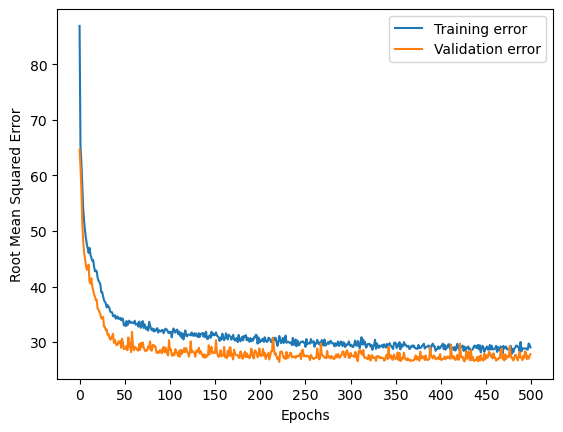

In [78]:
plt.Figure(figsize=(14,6), dpi=100)

plt.plot(large_drop_model_df_root_metrics["rmse"], label = 'Training error')
plt.plot(large_drop_model_df_root_metrics["val_rmse"], label = 'Validation error')

plt.xlabel("Epochs")
plt.ylabel("Root Mean Squared Error")

# plt.xlim([0, epochs])
# plt.xticks(range(2,10))
plt.xticks(np.arange(0, 500+1, 50.0))
plt.legend()

plt.show()

In [79]:
# Prediction on test set
X_test_scaled = st_scaler.transform(X_test)
y_pred = large_drop_model.predict(X_test_scaled)

51/51 [==============================] - 0s 841us/step


In [80]:
print(f"MAE: {mean_absolute_error(y_test, y_pred):.2f}")
print(f"MSE: {mean_squared_error(y_test, y_pred):.2f}")
print(f"MAPE: {(mean_absolute_error(y_test, y_pred) / y_test.mean()) * 100:.2f}%")
print(f"RMSE: {mean_squared_error(y_test, y_pred, squared=False):.2f}")

MAE: 16.51
MSE: 673.88
MAPE: 21.69%
RMSE: 25.96


We tried to implement the dropout layers in order to improve performance, but our research showed that it is less necessary to use dropout layers when using the relu activation function. We wanted to experiment whether they would significantly impact the performance regardless. We found that using dropout layers did not impact the performance positively with each run due to the stochastical nature of neural networks but we kept our result in the notebook to show our efforts.

Outlook: The performance could be improved by adding more options as hyperparameters, e.g. batch size. This would increase the computational requirements by a lot. To improve our computational power we could adjust the Neural Network to be trained on our GPU or on remote servers with more computational power. 